### Objective: Customer Segmentation, based on : each customer, price and date. 
- from this, we can do rfm Analysis, based on  recency (the date they made their last purchase)
frequency (how often they make purchases)
and monetary value (the amount spent on purchases)
- Customer behavior eda
- understand the rfm analysis. 
- Do a basic segmentation 
- Categorize Description into main Categories. 

#### Connect to Redshift 

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
#library to connect to red shift 
import psycopg2 
import os 

#to supress any warnings 
import warnings
warnings.filterwarnings('ignore')


In [27]:
#to import passwords and access information from .env file 

from dotenv import load_dotenv
load_dotenv()

dbname = os.getenv('dbname')
host = os.getenv('host')
port = os.getenv('port')
user = os.getenv('user')
password = os.getenv('password')


In [28]:
# connect to redshift
def connect_to_redshift (dbname, host, port, user, password): 
    connect = psycopg2.connect(dbname=dbname, host=host, port=port, user=user, password=password)
    print('connection to redshift made') 
    return connect
    

In [29]:
connect = connect_to_redshift(dbname, host, port, user, password)

connection to redshift made


In [6]:
query = ''' select * 
            from bootcamp.online_transactions_cleaned'''

customer_data = pd.read_sql(query, connect)           

In [7]:
customer_data.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.8,2010-12-01 09:53:00,u18074,United Kingdom
1,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.0,2010-12-01 10:29:00,u13705,United Kingdom
2,536401,22068,BLACK PIRATE TREASURE CHEST,1.65,2,3.3,2010-12-01 11:21:00,u15862,United Kingdom
3,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.8,2010-12-01 11:49:00,u1792,United Kingdom
4,536420,21889,WOODEN BOX OF DOMINOES,1.25,12,15.0,2010-12-01 12:03:00,u16583,United Kingdom


#### Eda Customer Behavior using SQL Queries 

In [9]:
#How many invoices does the table contain? = 21,791
query = '''select count(distinct invoice)
from bootcamp.online_transactions_cleaned otc 
'''
pd.read_sql(query, connect)

,count
0,21791


In [10]:
#When was the first and last purchase? first_purchase: 2010-12-01 08:26:00.000, last_purchase: 2010-12-01 08:26:00.000
query = '''select min(invoice_date) as first_purchase, 
	   max(invoice_date) as last_purchase	
from bootcamp.online_transactions_cleaned otc'''

pd.read_sql(query, connect)


,first_purchase,last_purchase
0,2010-12-01 08:26:00,2011-12-09 12:50:00


In [11]:
#How many customers does the table contain? = 4363
query = '''select count(distinct customer_id)
from   bootcamp.online_transactions_cleaned otc'''
pd.read_sql(query, connect)

,count
0,4363


In [12]:
#How many different types of stocks did the customer purchase? count distinct item per customer 
query = '''select  customer_id, 
	    count(distinct stock_code) as types_stocks
from bootcamp.online_transactions_cleaned otc	
group by customer_id
order by customer_id'''
pd.read_sql(query, connect)


,customer_id,types_stocks
0,u12346,1
1,u12347,103
2,u12348,21
3,u12349,72
4,u1235,16
...,...,...
4358,u1828,10
4359,u18281,7
4360,u18282,12
4361,u18283,262


In [13]:
#What is the most popular stock? (You can look at top 10 sold items - does this differ across markets?)

query = '''select stock_code, 
	   description, 
		country,
		sum(quantity) as top_purchased 
from   bootcamp.online_transactions_cleaned otc
group by country, stock_code , description  
order by top_purchased desc
-- Where country = ''
limit 10'''
pd.read_sql(query, connect)


,stock_code,description,country,top_purchased
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,United Kingdom,47886
1,22197,POPCORN HOLDER,United Kingdom,45194
2,85099B,JUMBO BAG RED RETROSPOT,United Kingdom,40777
3,84879,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,32580
4,85123A,CREAM HANGING HEART T-LIGHT HOLDER,United Kingdom,32136
5,22616,PACK OF 12 LONDON TISSUES,United Kingdom,24297
6,17003,BROCADE RING PURSE,United Kingdom,22672
7,21212,PACK OF 72 RETROSPOT CAKE CASES,United Kingdom,22182
8,22178,VICTORIAN GLASS HANGING T-LIGHT,United Kingdom,21427
9,21977,PACK OF 60 PINK PAISLEY CAKE CASES,United Kingdom,19882


In [14]:
#What is the average order value i.e. price * quantity? = average of total order value = 20.72 

query = '''select round(avg(total_order_value), 2) as average_order_value
from   bootcamp.online_transactions_cleaned otc'''

pd.read_sql(query, connect)


,average_order_value
0,20.72


In [15]:
#How many Stocks have the Description “Unknown”? How will you handle this when building customer segments? = 1172
query = '''select count(description) as no_unknown
from   bootcamp.online_transactions_cleaned otc 
where description = 'Unknown' '''

pd.read_sql(query, connect)



,no_unknown
0,1172


####  Use Python to Analyze and Visualize the Data


What are the top ten most popular geographical locations?
Which country spends the most (you can look at price, quantity or order value i.e. price * quantity)?
You could look at seasonality
Visualize the distribution of Invoices per month?
Which month has the highest number of transactions?
Which day of the week has the highest number of transactions?

Make sure you are filtering by year!!! Does this help with segmenting the customers?

Which customers could be considered high profile customers?
Calculate an order value field, this is the price * quantity. Identify customers that have spent more than the average user.
Which customers have purchased the most (look at the frequency of orders)?
Can you say anything about customers that purchased recently?

Which customers have spent the least amount? What should the company do about such customers?
What conclusions can you draw about the customers of this online gifts platform? Ideally you want to come up with several segments of customers - your most important customers, customers that need enticing back to purchase and your regular and dependable customers.


In [16]:
customer_data.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.8,2010-12-01 09:53:00,u18074,United Kingdom
1,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.0,2010-12-01 10:29:00,u13705,United Kingdom
2,536401,22068,BLACK PIRATE TREASURE CHEST,1.65,2,3.3,2010-12-01 11:21:00,u15862,United Kingdom
3,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.8,2010-12-01 11:49:00,u1792,United Kingdom
4,536420,21889,WOODEN BOX OF DOMINOES,1.25,12,15.0,2010-12-01 12:03:00,u16583,United Kingdom


In [19]:
# What are the top ten most popular geographical locations?
top_10_countries = customer_data['country'].value_counts().nlargest(10)
top_10_countries.plot(kind='bar')

country
United Kingdom    356158
Germany             9081
France              8154
EIRE                7469
Spain               2463
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1427
Australia           1256
Name: count, dtype: int64

In [42]:
#number of customers per country 
query = '''
      select country, 
      count(distinct customer_id) as number_customers
      from bootcamp.online_transactions_cleaned otc
      group by country
      order by count(distinct customer_id) desc
      limit 10; 
'''

customers_per_country = pd.read_sql(query, connect) 

In [44]:
customers_per_country.head(10)

,country,number_customers
0,United Kingdom,3943
1,Germany,95
2,France,87
3,Spain,30
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,14
8,Finland,12
9,Austria,11


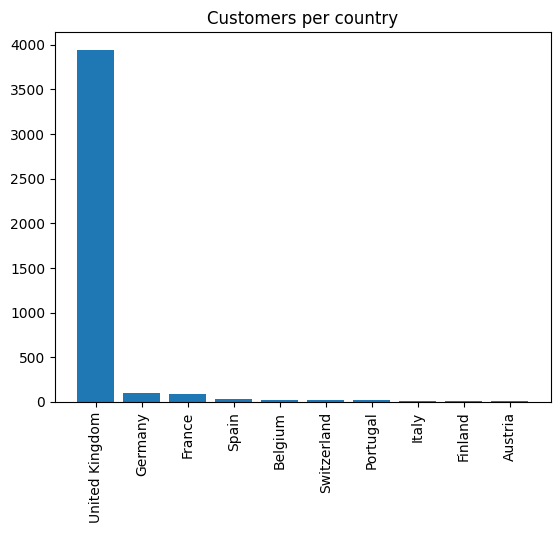

In [52]:
plt.bar(customers_per_country.country, customers_per_country.number_customers)
plt.title('Customers per country')
plt.xticks(rotation=90);

In [31]:
#Which country spends the most (you can look at price, quantity or order value i.e. price * quantity)?
customer_data.groupby('country')['total_order_value'].sum().sort_values(ascending=False)

country
United Kingdom          6815375.093
Netherlands              283479.540
EIRE                     251557.470
Germany                  200619.660
France                   181571.540
Australia                136922.500
Switzerland               51859.400
Spain                     51746.650
Belgium                   36662.960
Japan                     35419.790
Sweden                    35166.410
Norway                    32292.960
Portugal                  26500.260
Channel Islands           20076.390
Finland                   18303.540
Denmark                   18042.140
Italy                     15276.340
Cyprus                    12843.760
Singapore                  9120.390
Austria                    8698.320
Israel                     6988.400
Poland                     6853.140
Greece                     4425.520
Iceland                    4310.000
Canada                     3115.440
Unspecified                2660.770
Malta                      1980.470
United Arab Emirates

In [32]:
uk_data= customer_data[customer_data.country =='United Kingdom']

In [ ]:
#You could look at seasonality 

In [33]:
uk_data.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.8,2010-12-01 09:53:00,u18074,United Kingdom
1,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.0,2010-12-01 10:29:00,u13705,United Kingdom
2,536401,22068,BLACK PIRATE TREASURE CHEST,1.65,2,3.3,2010-12-01 11:21:00,u15862,United Kingdom
3,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.8,2010-12-01 11:49:00,u1792,United Kingdom
4,536420,21889,WOODEN BOX OF DOMINOES,1.25,12,15.0,2010-12-01 12:03:00,u16583,United Kingdom


#### Dividing dataset to sales and refunds
uk_dataset contains both sales and refunds represented with negative values of total_order_value. 
it is not possible to trace back the original orders that was ttotally or partially refunded. 

In [71]:
uk_data.describe()

,price,quantity,total_order_value,invoice_date
count,356158.000000,356158.000000,356158.000000,356158
mean,2.934925,11.209469,19.135819,2011-07-10 19:29:30.475575552
min,0.000000,-80995.000000,-168469.600000,2010-12-01 08:26:00
25%,1.250000,2.000000,3.900000,2011-04-07 09:16:00
50%,1.950000,4.000000,10.200000,2011-07-31 11:26:00
75%,3.750000,12.000000,17.700000,2011-10-21 13:50:00
max,1599.260000,80995.000000,168469.600000,2011-12-09 12:49:00
std,7.593035,265.163811,449.965357,NaN


In [73]:
uk_sales = uk_data[uk_data['total_order_value']> 0]

In [74]:
uk_sales.describe()

,price,quantity,total_order_value,invoice_date
count,348919.000000,348919.000000,348919.000000,348919
mean,2.902304,12.134788,20.794754,2011-07-11 03:37:13.726681344
min,0.001000,1.000000,0.001000,2010-12-01 08:26:00
25%,1.250000,2.000000,4.200000,2011-04-07 11:59:00
50%,1.950000,4.000000,10.200000,2011-07-31 14:19:00
75%,3.750000,12.000000,17.850000,2011-10-23 11:10:00
max,1599.260000,80995.000000,168469.600000,2011-12-09 12:49:00
std,7.536726,190.663827,328.141559,NaN


In [75]:
uk_refunds = uk_data[uk_data['total_order_value'] < 0]

In [76]:
uk_refunds.describe()

,price,quantity,total_order_value,invoice_date
count,7218.000000,7218.000000,7218.000000,7218
mean,4.520362,-35.251455,-61.001626,2011-06-24 10:32:22.676641792
min,0.030000,-80995.000000,-168469.600000,2010-12-01 09:49:00
25%,1.450000,-6.000000,-16.300000,2011-03-21 12:50:00
50%,2.550000,-2.000000,-8.250000,2011-07-04 15:59:00
75%,4.950000,-1.000000,-3.250000,2011-10-06 18:39:00
max,295.000000,-1.000000,-0.120000,2011-12-09 11:58:00
std,9.819749,1299.379754,2186.184965,NaN


#### Extracting Information from datetype.

In [78]:
uk_sales['year'] = pd.to_datetime(uk_sales["invoice_date"]).dt.year
uk_sales["month"] = pd.to_datetime(uk_sales["invoice_date"]).dt.month
#uk_sales['Month_Name_year_wise'] = pd.to_datetime(uk_sales["InvoiceDate"]).dt.month_name()

In [79]:
uk_sales.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month
0,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.8,2010-12-01 09:53:00,u18074,United Kingdom,2010,12
1,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.0,2010-12-01 10:29:00,u13705,United Kingdom,2010,12
2,536401,22068,BLACK PIRATE TREASURE CHEST,1.65,2,3.3,2010-12-01 11:21:00,u15862,United Kingdom,2010,12
3,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.8,2010-12-01 11:49:00,u1792,United Kingdom,2010,12
4,536420,21889,WOODEN BOX OF DOMINOES,1.25,12,15.0,2010-12-01 12:03:00,u16583,United Kingdom,2010,12


In [83]:
#Visualize the distribution of Invoices per month?

uk_sales.groupby(['month','year'])['invoice'].nunique()

month  year
1      2011     871
2      2011     893
3      2011    1175
4      2011    1054
5      2011    1400
6      2011    1248
7      2011    1193
8      2011    1126
9      2011    1556
10     2011    1692
11     2011    2379
12     2010    1287
       2011     705
Name: invoice, dtype: int64

In [84]:
uk_sales.groupby(['month','year'])['total_order_value'].sum()

month  year
1      2011    440766.930
2      2011    354513.560
3      2011    465487.120
4      2011    406054.551
5      2011    541802.240
6      2011    523002.460
7      2011    483273.101
8      2011    494095.420
9      2011    791264.451
10     2011    815525.720
11     2011    972751.390
12     2010    496219.170
       2011    470928.720
Name: total_order_value, dtype: float64

In [ ]:
#dealing with days of the week. 


In [85]:
uk_sales['day'] = pd.to_datetime(uk_sales["invoice_date"]).dt.day
uk_sales['week_day'] = pd.to_datetime(uk_sales["invoice_date"]).dt.weekday
uk_sales["day_name"] = pd.to_datetime(uk_sales["invoice_date"]).dt.day_name()

In [86]:
uk_sales

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month,day,week_day,day_name
0,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.8,2010-12-01 09:53:00,u18074,United Kingdom,2010,12,1,2,Wednesday
1,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.0,2010-12-01 10:29:00,u13705,United Kingdom,2010,12,1,2,Wednesday
2,536401,22068,BLACK PIRATE TREASURE CHEST,1.65,2,3.3,2010-12-01 11:21:00,u15862,United Kingdom,2010,12,1,2,Wednesday
3,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.8,2010-12-01 11:49:00,u1792,United Kingdom,2010,12,1,2,Wednesday
4,536420,21889,WOODEN BOX OF DOMINOES,1.25,12,15.0,2010-12-01 12:03:00,u16583,United Kingdom,2010,12,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399833,581452,21175,GIN AND TONIC DIET METAL SIGN,2.55,24,61.2,2011-12-08 18:03:00,u17675,United Kingdom,2011,12,8,3,Thursday
399835,581472,22795,SWEETHEART RECIPE BOOK STAND,6.75,6,40.5,2011-12-08 19:55:00,u15796,United Kingdom,2011,12,8,3,Thursday
399837,581478,23126,DOLLCRAFT GIRL AMELIE,4.95,4,19.8,2011-12-09 08:59:00,u17364,United Kingdom,2011,12,9,4,Friday
399839,581501,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1.25,12,15.0,2011-12-09 10:46:00,u12985,United Kingdom,2011,12,9,4,Friday


In [88]:
#Which day of the week has the highest number of transactions?
uk_sales.groupby('day_name')['invoice'].nunique()

day_name
Friday       2467
Monday       2539
Sunday       2037
Thursday     3583
Tuesday      2872
Wednesday    3081
Name: invoice, dtype: int64

In [89]:
uk_sales.groupby('day_name')['total_order_value'].sum()

day_name
Friday       1212560.651
Monday       1119538.130
Sunday        687648.311
Thursday     1557083.730
Tuesday      1403814.841
Wednesday    1275039.170
Name: total_order_value, dtype: float64

Most Sales are made Tuesday and Thursday. 

#### High profile customers

In [90]:
#Calculate an order value field, this is the price * quantity. Identify customers that have spent more than the average user.
uk_sales.groupby('customer_id')['total_order_value'].sum().sort_values(ascending=False)

customer_id
u18102    259657.30
u1745     194390.79
u16446    168472.50
u17511     91062.38
u12346     77183.60
            ...    
u16878        13.30
u17956        12.75
u14792         6.20
u16454         5.90
u16738         3.75
Name: total_order_value, Length: 3916, dtype: float64

In [93]:
#Which customers have purchased the most (look at the frequency of orders)?

uk_sales.groupby(['customer_id','invoice'])['invoice'].count().sort_values(ascending=False)

customer_id  invoice
u14096       576339     542
             579196     533
             580727     529
             578270     442
             573576     435
                       ... 
u15267       573231       1
u17841       574549       1
u1529        564714       1
u15291       574884       1
u12346       541431       1
Name: invoice, Length: 16579, dtype: int64